# Credit Card Fraud Detection


## Introduction

From the moment the e-commerce payment systems came to existence, there have always been people who will find new ways to access someone’s finances illegally. This has become a major problem in the modern era, as all transactions can easily be completed online by only entering your credit card information.

Payment card fraud is a major challenge for businesses, payment card issuers and tranactional service companies. The losses from payment card fraud reached 28.6 billion worldwide in 2019 according to [Nilson Report Data](https://nilsonreport.com/content_promo.php?id_promo=16). United States alone is responsible for more than a third of the total global loss, making it the most card fraud prone country in the world. 

The corona virus pandemic has also fueled an explosive growth in card fraud activity because many consumers and retailers decided it was not worth the risk and pivoted to using their bank cards and phones to make everyday purchases. In the UK, card payments were 75.3% higher in early April 2020 compared with a year earlier, while contactless payment limits also rose to $100, making the switch to contactless even more appealing.

Unfortunately, this rapid change was overshadowed by increased levels of fraud. It impacts consumers, merchants and issuers alike. Its economic cost goes far beyond the cost of illegally purchased merchandise because businesses often spend millions to protect themselves from fraud. Big businesses can absorb some amount of losses but if a small one-shop business or a restaurant all of a sudden has a $10,000 loss, that could be the difference between making payroll and not making payroll for that company.

It should also be noted that fraud detection is a cat and mouse game, where fraudulent patterns change over time. As technology evolves, both in terms of fraud prevention and ease of use of payment systems, so do fraudster techniques. They adapt by moving from the old (and by now fixed) targets to the vulnerability of the new technologies.

Credit card fraud detection (CCFD) is like looking for needles in a haystack. It requires finding, out of millions of daily transactions, which ones are fraudulent. Due to the ever-increasing amount of data, it is now almost impossible for a human specialist to detect meaningful patterns from transaction data. For this reason, the use of machine learning techniques is now widespread in the field of fraud detection, where information extraction from large datasets is required.

Credit Card Fraud Detection with Machine Learning is a process of data investigation and the development of a model that will provide the best results in revealing and preventing fraudulent transactions. This is achieved through bringing together all meaningful features of card users’ transactions. The information is then run through a subtly trained model that finds patterns and rules so that it can classify whether a transaction is fraudulent or is legitimate. 


## Objective


*   Train a Machine Learning Model with historic data to learn patterns behind fraudulent behavior to enable the model filter out fraudulent transactions and stop them from occurring in real-time.


## Data

Simulated credit card transaction dataset from [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection) containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

This was generated using [Sparkov Data Generation | Github](https://github.com/namebrandon/Sparkov_Data_Generation) tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were then combined and converted into a standard format.

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import pearsonr

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
)
import warnings

warnings.filterwarnings("ignore")

## Import and Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_df=pd.read_csv('/content/drive/MyDrive/archive (2)/fraudTest.csv')
test_df=pd.read_csv('/content/drive/MyDrive/archive (2)/fraudTrain.csv')

In [3]:
#concat data

df=pd.concat([train_df, test_df])

## Exploratory Data Analysis (EDA)

In [4]:
# drop the unnamed column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
#check for nulls

df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [22]:
#check information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [23]:
#check for duplicates

df.duplicated().sum()

0

In [24]:
#check shape of dataframe

df.shape

(1852394, 22)

In [5]:
#check duplicated index

df.index.duplicated().sum()

555719

In [6]:
#drop duplicated indexes

df=df.loc[~df.index.duplicated(), :]

In [7]:
df.index.duplicated().sum()

0

In [25]:
#check summary statistics for dataframe

df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [26]:
#check correlation

df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
cc_num,1.000000,0.002406,0.041563,-0.059383,-0.048686,-0.009103,0.000200,-0.059014,-0.048698,-0.000189,-0.000058,-0.000984,0.000132,-0.000501
amt,0.002406,1.000000,0.003019,-0.001305,-0.001797,0.004777,-0.002360,-0.001133,-0.001766,0.205802,-0.010280,-0.025355,0.001652,-0.001717
zip,0.041563,0.003019,1.000000,-0.114866,-0.909715,0.077161,0.000452,-0.114322,-0.908900,-0.000794,0.009515,0.006426,0.000081,0.000905
lat,-0.059383,-0.001305,-0.114866,1.000000,-0.013675,-0.154196,0.000684,0.993578,-0.013642,0.001603,0.046844,-0.010570,0.001330,-0.000849
long,-0.048686,-0.001797,-0.909715,-0.013675,1.000000,-0.052315,0.000063,-0.013432,0.999118,-0.000153,-0.028683,-0.002475,0.000246,-0.001057
city_pop,-0.009103,0.004777,0.077161,-0.154196,-0.052315,1.000000,-0.001212,-0.153270,-0.052269,0.000572,-0.090671,0.019982,0.000098,0.000582
unix_time,0.000200,-0.002360,0.000452,0.000684,0.000063,-0.001212,1.000000,0.000581,0.000053,-0.012942,-0.003253,-0.002481,-0.083518,0.171373
merch_lat,-0.059014,-0.001133,-0.114322,0.993578,-0.013432,-0.153270,0.000581,1.000000,-0.013401,0.001468,0.046534,-0.010456,0.001262,-0.000862
merch_long,-0.048698,-0.001766,-0.908900,-0.013642,0.999118,-0.052269,0.000053,-0.013401,1.000000,-0.000180,-0.028659,-0.002528,0.000188,-0.001046
is_fraud,-0.000189,0.205802,-0.000794,0.001603,-0.000153,0.000572,-0.012942,0.001468,-0.000180,1.000000,0.012225,0.013830,0.007409,-0.012362


## Count plot of Target Variable (Fraud)

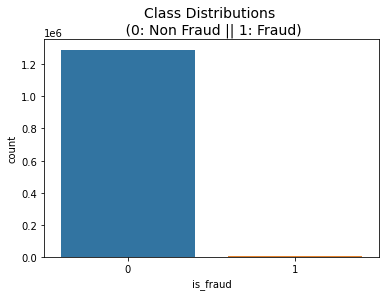

In [10]:
sns.countplot(x=df['is_fraud'])
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14);

We can visually see how heavily imbalanced our data set is.

## Amount vs Fraud

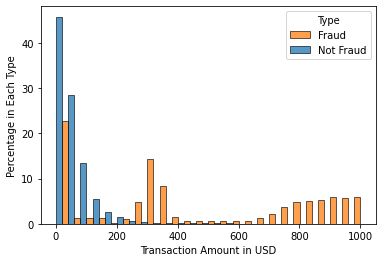

In [11]:
#amount vs fraud

ax = plt.subplots(figsize=(15, 8))
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

Normal transactions tend to be around \\$200 or less, we see fraudulent transactions peak around \\$300 and then at the \$800-\\$1000 range. 

## Spending Category vs Fraud


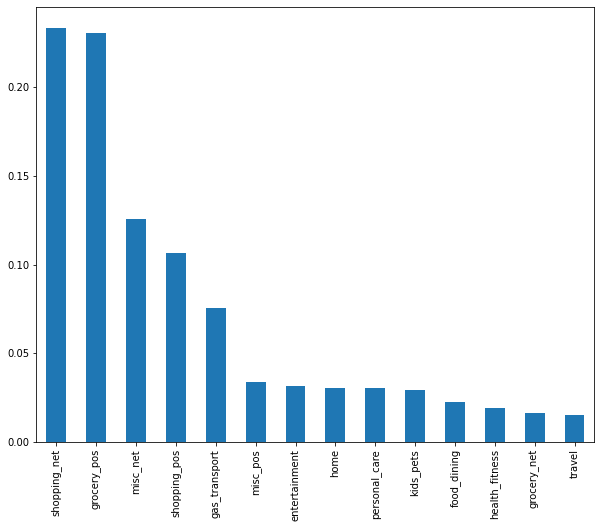

In [15]:
df[(df['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar', figsize=(10,8));

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net'.

##  Age vs Fraud
 

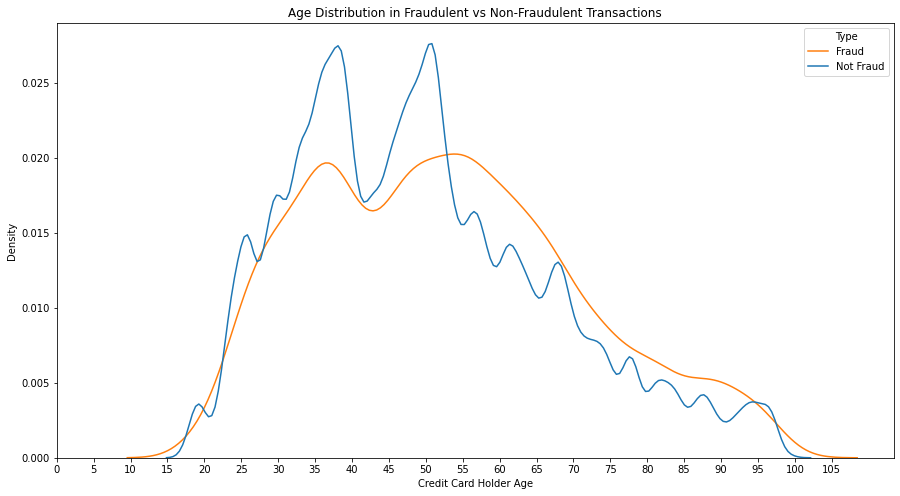

In [20]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax = plt.subplots(figsize=(15, 8))
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

## Cyclicality of Credit Card Fraud

#### Hourly Trend

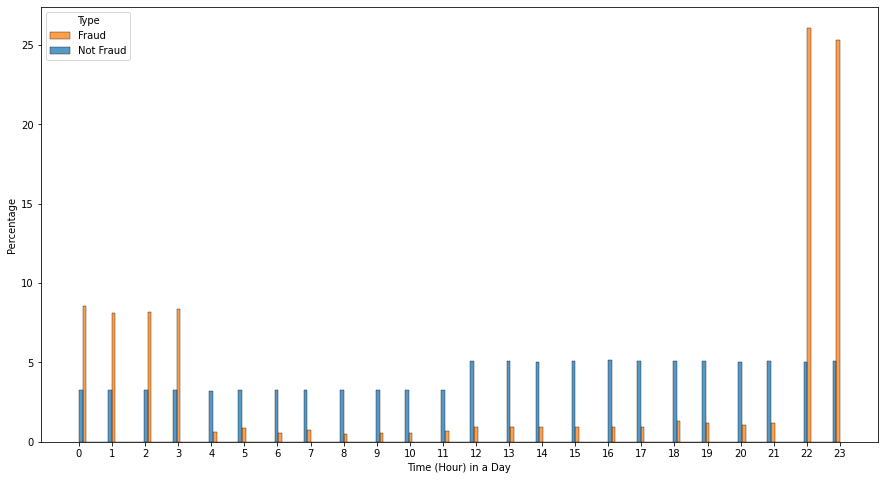

In [21]:
#time in a day vs fraud

df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax = plt.subplots(figsize=(15, 8))
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

A very sharp contrast! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep!

#### Weekly Trend

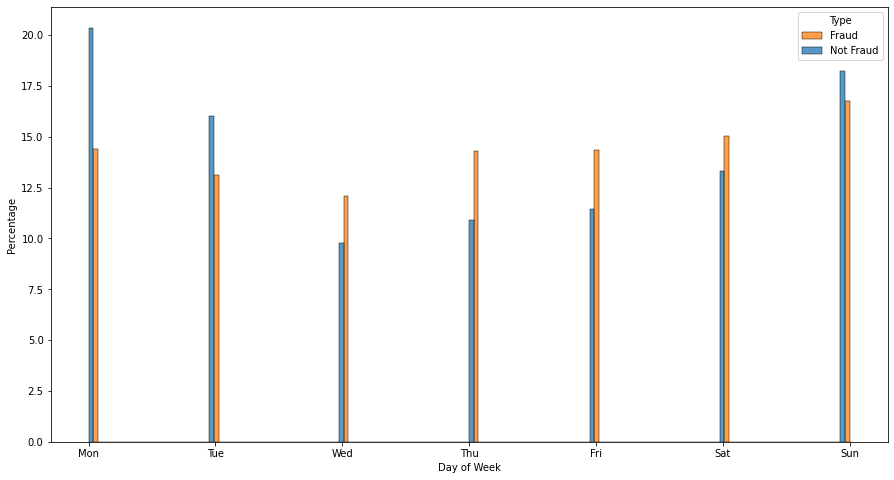

In [22]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax = plt.subplots(figsize=(15, 8))
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week. 

#### Monthly Trend

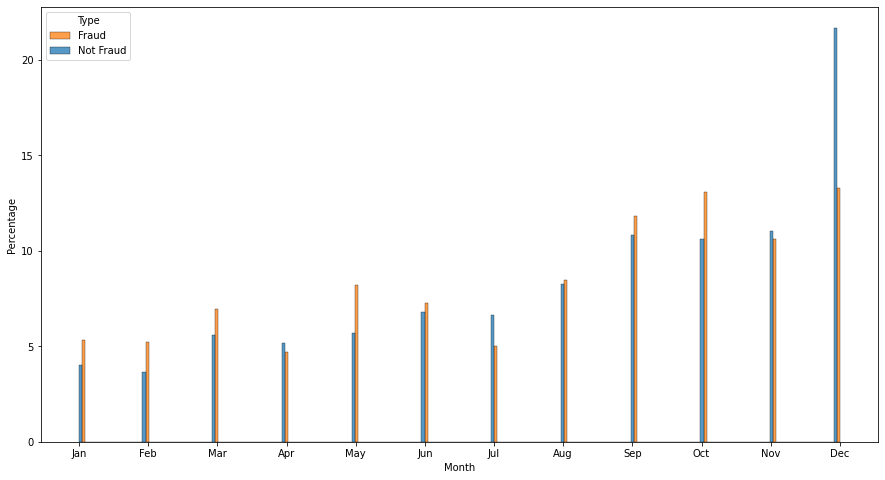

In [23]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax = plt.subplots(figsize=(15, 8))
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

## State vs Fraud

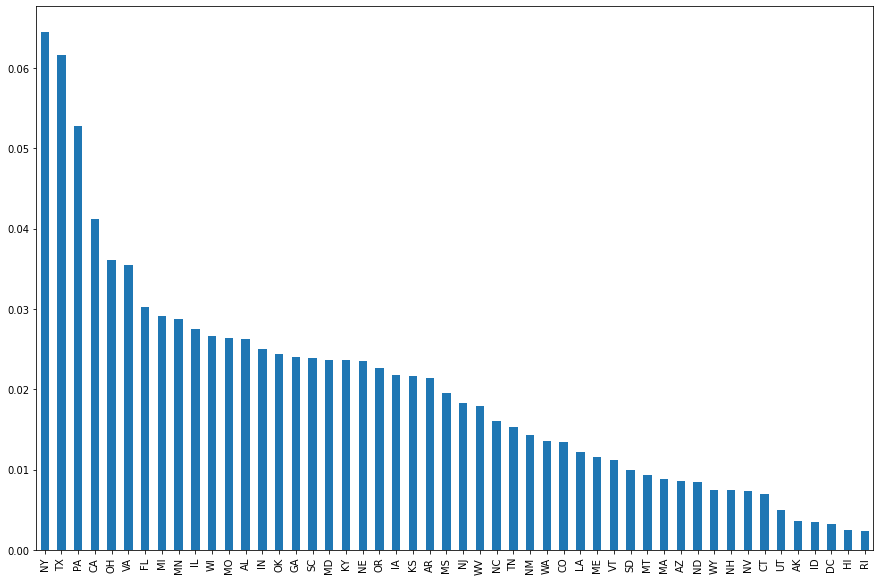

In [24]:
df[(df['is_fraud']==1)].state.value_counts(normalize= True, ascending= False).plot(kind='bar', figsize=(15,10));

As can be seen, NY TX and PA among others have a higher count of fraudulent transactions.

# Data Modeling 

## Feature Selection

In [8]:
#Numerical Features

df_nu = df.select_dtypes(exclude=["object"]).copy()

In [9]:
Xnum = df_nu.drop(["is_fraud"], axis= "columns")
ynum = df_nu.is_fraud

In [10]:
# Identifying the predictive features using the Pearson Correlation p-value

pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
cc_num,-0.0002,0.8297
amt,0.2058,0.0000
zip,-0.0008,0.3662
lat,0.0016,0.0679
long,-0.0002,0.8616
city_pop,0.0006,0.5150
unix_time,-0.0129,0.0000
merch_lat,0.0015,0.0947
merch_long,-0.0002,0.8379


Drop columns with p-value > 0.05 because it has low information to the target, and keep all the others.

In [11]:
df=df.drop(['cc_num','zip','lat','long','city_pop','merch_lat','merch_long','trans_date_trans_time', 'merchant', 'first', 'last',
            'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num','unix_time'], axis=1)

In [31]:
df.head()

,category,amt,is_fraud,age,hour,day,month
0,personal_care,2.86,0,55,12,6,6
1,personal_care,29.84,0,33,12,6,6
2,health_fitness,41.28,0,53,12,6,6
3,misc_pos,60.05,0,36,12,6,6
4,travel,3.19,0,68,12,6,6


In [12]:
#encode category column

df = pd.get_dummies(df, 'category')

In [13]:
X=df.drop('is_fraud', axis=1)
y=df.is_fraud

## SMOTE to balance data

In [14]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [15]:
print(y.value_counts())

0    1290265
1    1290265
Name: is_fraud, dtype: int64


## Split Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Scale Data

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Logistic Regression

In [38]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

In [41]:
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90    257922
           1       0.93      0.85      0.89    258184

    accuracy                           0.89    516106
   macro avg       0.90      0.89      0.89    516106
weighted avg       0.90      0.89      0.89    516106

Confusion matrix:
 [[241565  16357]
 [ 39383 218801]]


In [42]:
# ROC_AUC score

roc_auc_score(y_test, y_pred)  

0.8920215512575794

In [43]:
#accuracy

accuracy_score(y_test, y_pred)  

0.8919989304522714

## Random Forest 

In [22]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test) 

In [23]:
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    257922
           1       0.93      0.93      0.93    258184

    accuracy                           0.93    516106
   macro avg       0.93      0.93      0.93    516106
weighted avg       0.93      0.93      0.93    516106

Confusion matrix:
 [[240528  17394]
 [ 17921 240263]]


In [24]:
#ROC_AUC score

roc_auc_score(y_test, y_pred)  

0.9315746347252072

In [25]:
#accuracy

accuracy_score(y_test, y_pred)  

0.9315741339957295

## Observations

The models perform better with a balanced dataset.

## Summary

Random Forest performed better with an accuracy and ROC_AUC score of 93%.